## 1. 딥러닝의 정의

- 딥러닝은 신경망이 발전한 모델이다.
- 신경망  
: 학습하는 알고리즘의 특성상 과적합이 심하게 일어나며 gradient vanishing이 일어난다.
- 딥러닝의 정의  
① 2개 이상의 hidden layer를 지니고 있는 다층 신경망(DNN)  
② graphical representation learning이라는 특징

## 2. 딥러닝이 발전하게 된 계기

1. 신경망의 단점으로 지적돼 왔던 __과적합__과 __gradient vanishing__을 완화시킬 수 있는 알고리즘이 발전  
2. 신경망의 단점으로 타 알고리즘 대비 학습 시간이 매우 오래 걸리는 문제 -> Graphics Processing Unit(__GPU__)을 신경망의 연산에 사용 가능

## 3. 딥러닝의 종류

- 딥러닝은 매우 다양한 형태로 발전
- MLP
- CNN (이미지 관련 분야에서 많이 사용)
- RNN (텍스트와 같은 시계열 분야에 많이 사용)
- __딥러닝은 CNN과 RNN 구조를 바탕으로 다양하게 파생돼 발전__하고 있다.

## 4. 딥러닝의 발전을 이끈 알고리즘

### 4.1 Dropout

- 신경망의 학습 과정 중 layer의 노드를 랜덤하게 drop함으로써 generalization 효과를 가져오게 하는 테크닉.
- dropout을 적용한다.  
  = weight matrix에 랜덤하게 일부 column에 0을 집어넣어 연산을 한다고 이해하면 됨.
- dropout을 적용할 때는 얼마나 랜덤하게 dropout할 것인지에 대한 확률값을 지정해야 하며, 이는 input layer와 hidden layer에도 적용할 수 있다. 
- epoch마다 랜덤하게 dropout한다.  
- (ex) input layer에 대해 20%, hidden layer에 대해 30%를 적용하는 경우 가정  
  => input data의 column에 랜덤하게 20%는 0을 집어넣고 weight matrix의 column에도 랜덤하게 30%는 0을 집어넣어 feed forward를 진행하고 back propagation을 진행한다.  
  => 그다음 epoch에서 dropout을 적용할 때 이번 epoch와 독립적으로 랜덤하게 적용한다. (= 이전 epoch와는 다른 column에 0을 집어넣는 것)  
  => 이러한 방식으로 계속 연산하면 과적합을 어느 정도 방지하는 효과를 가져옴.
- dropout은 처음 제안된 이후로도 현재까지 기본적으로 신경망을 디자인할 때 범용적으로 많이 사용되고 있는 테크닉임.
- 유전 알고리즘에서 '돌연변이'의 개념을 신경망에서 랜덤한 dropout으로 적용한 것. 
- dropout은 ensemble learning의 random foreset의 개념과 비교해 볼 수도 있다.  
- __random foreset__ : 다양한 모델을 만들기 위해 데이터를 랜덤하게 구성하고 변수도 랜덤하게 구성한 것.
- __신경망의 한 epoch__을 _'하나의 모델'_ 로 보고 __dropout__을 _'랜덤한 변수의 구성'_ 으로 본다면, dropout을 적용한 신경망은 일종의 random foreset와 비슷한 모델 구성이라 볼 수 있다. 

- dropout은 보통 __ReLU() 비선형 함수와 잘 어울린다.__

### 4.2 Activation 함수

- activation 함수  
: 어떤 신호를 입력받아 이를 적절히 처리해 출력해주는 함수를 의미  
: MLP에서 기본적으로 sigmoid 함수를 사용.
- back propagation 과정 중에 sigmoid를 미분한 값을 계속 곱해주면서 gradient값이 앞 단의 layer로 올수록 0으로 수렴하는 현상 발생 (__gradient vanishing__)
- gradient vanishing은 hidden layer가 깊어질수록 심해지기 때문에 hidden layer를 깊게 쌓아 복잡한 모델을 만들 수 있다는 장점의 의미 x

#### 4.2.1 ReLU 함수

- ReLU 함수는 기존의 sigmoid 함수와 같은 비선형 활성 함수가 지니고 있는 문제점을 어느 정도 해결한 활성 함수이다.
- 입력값이 0 이상이면 이 값을 그대로 출력하고, 0 이하이면 0으로 출력하는 함수.
- ReLU 함수가 sigmoid 함수에 비해 좋은 이유?  
: 미분할 때 입력값이 0 이상인 부분은 기울기가 1, 입력값이 0 이하인 부분은 0이 되기 때문.  
: 즉, back propagation 과정 중 곱해지는 activation 미분값이 0 또는 1이 되기 때문에 __아예 없거나 완전히 살리는 것__으로 해석 가능.
- 이를 통해 hidden layer가 깊어져도 gradient vanishing이 일어나는 것을 완화시키며, layer를 깊게 쌓아 복잡한 모형을 만들 수 있게 됨.
- gradient를 빠르게 계산하고 back propagation을 효과적으로 이용할 수 있기 때문에 많은 딥러닝 모형을 설계할 때 많이 이용
- ReLU의 변형으로 Leaky ReLU, ELU, parametric ReLU, SELU, SERLU 등 등장.
- 활성함수 내에서 어느 정도 일반화된 성능 차이는 있을 수 있지만, 딥러닝을 적용하는 분야에 따라 조금씩 성능의 차이는 있을 수 있다.

### 4.3 Batch Normalization

- 신경망에는 _과적합_ 과 _gradient vanishing_ 외에도 __internal covariance shift__라는 현상이 발생한다.
- __internal covariance shift__  
: 각 layer마다 input 분포가 달라짐에 따라 학습 속도가 느려지는 현상.  
- Batch Normalization  
: __internal covariance shift을 방지하기 위한 기법.__  
: 즉, __layer의 input 분포를 정규화해 학습 속도를 빠르게 하겠다는 것!__  
: 각 레이어마다 Normalization을 하는 레이어를 두어, 변형된 분포가 나오지 않도록 하는 것.  
: 미니배치 마다 Normalization을 한다는 뜻에서 Batch Normalization
- Batch Normalization 수식  
: $BN(h; \gamma, \beta) = \beta + \gamma \frac{h-E(h)}{\sqrt{(Var(h) + \mathcal{E})}}$
- $h$ : input 분포
- $\beta$와 $\gamma$가 없다고 가정하면 기본적으로 __정규화__하는 수식과 일치하는 것을 알 수 있다.
- $\beta$ : 분포를 shift(이동) 시키는 값
- $\gamma$ : 분포를 scaling 시키는 값
- $\beta$와 $\gamma$는 back propagation을 통해 학습
- Batch Normalization을 사용하면 학습 속도 향상 & gradient vanishing 문제 완화.  
- Batch Normalization 하지 않는다면 hidden layer를 쌓으면서 비선형 활성함수를 사용하는 의미가 없어질 가능성 있다.
- Batch Normalization의 분포를 정규화해 비선형 활성함수의 의미를 살리는 개념
- (참고) https://wegonnamakeit.tistory.com/47 

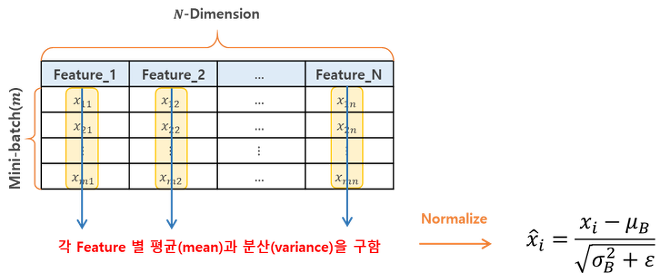

In [1]:
from IPython.display import Image
Image(filename='1.png', width=500)
# 배치 정규화는 아래의 그림과 같이 미니배치(mini-batch)의 데이터에서 각 feature(특성)별 평균과 분산을 구한 뒤 정규화(normalize) 해준다.
# 출처 : https://excelsior-cjh.tistory.com/178

- Batch Normalization은 1-Dimension, 2-Dimension, 3-Dimension 등 다양한 차원에 따라 적용되는 함수명이 다르므로 유의하기!
- MLP 내 각 layer에서 데이터는 1-Dimension 크기의 벡터값을 계산하기 때문에 nn.BatchNorm1d() 사용
- nn.BatchNorm 함수를 이용해 적용하는 부분은 논문, 코드에 따라 활성함수 전에 사용하는지, 후에 사용하는지 연구자들의 선호도에 따라 다름.